In [1]:
import os 
os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import subprocess, os
from bluesky.run_engine import RunEngine
from ophyd_async.core import DeviceCollector
from ophyd_async.epics.signal import epics_signal_r, epics_signal_rw
from ophyd_async.core.signal import observe_value, wait_for_value
from p99_bluesky.devices.p99.sample_stage import (
    FilterMotor,
    SampleAngleStage,
    p99StageSelections,
)
from p99_bluesky.plans.fast_scan import fast_scan_1d, fast_scan_grid
from p99_bluesky.plans.stxm import stxm_fast,get_velocity_and_step_size, stxm_step
from soft_motor import SoftThreeAxisStage
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
from ophyd.sim import noisy_det as det
bec = BestEffortCallback()
RE = RunEngine({})
from databroker import Broker
db = Broker.named('temp')
RE.subscribe(db.insert)
from p99_bluesky.sim.sim_stages import SimThreeAxisStage
async with DeviceCollector():
        xyz_motor = SimThreeAxisStage(name="sim_motor", instant=False)


2024-07-16 16:17:59,236 - P99 - INFO - Check sim_motor-x limits.
2024-07-16 16:17:59,237 - P99 - INFO - Check sim_motor-y limits.


Transient Scan ID: 2     Time: 2024-07-16 16:17:59
Persistent Unique Scan ID: '06f58cbe-68d0-4019-b8c4-9da30707f4cd'
New stream: 'primary'
+-----------+------------+---------------------------+---------------------------+------------+
|   seq_num |       time | sim_motor-x-user_readback | sim_motor-y-user_readback |  noisy_det |
+-----------+------------+---------------------------+---------------------------+------------+
|         1 | 16:18:02.4 |                     0.000 |                    -1.000 |      0.989 |
|         2 | 16:18:03.2 |                     0.000 |                    -0.333 |      1.055 |
|         3 | 16:18:03.9 |                     0.000 |                     0.333 |      1.055 |
|         4 | 16:18:04.7 |                     0.000 |                     1.000 |      0.901 |
|         5 | 16:18:06.7 |                     0.105 |   

('06f58cbe-68d0-4019-b8c4-9da30707f4cd',)

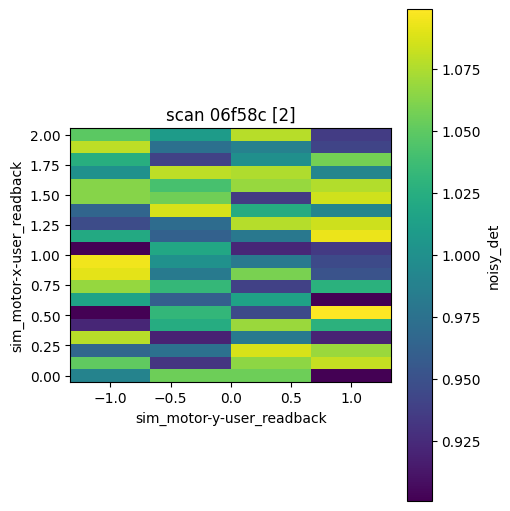

In [3]:
from collections import defaultdict
docs = defaultdict(list)

def capture_emitted(name, doc):
    docs[name].append(doc)

# Unknown step size
docs = defaultdict(list)
RE(
    stxm_step(
        det=[det],
        count_time=0.2,
        x_step_motor=xyz_motor.x,
        x_step_start=0,
        x_step_end=2,
        x_step_size=0.1,
        y_step_motor=xyz_motor.y,
        y_step_start=-1,
        y_step_end=1,
        y_step_size=0.5,
        home=True,
        snake=False,
    ),
    bec,
)


In [ ]:
RE.stop()

In [ ]:
import matplotlib.pyplot as plt
header = db[-1]
data = header.table()
plt.tricontourf(data["sim_motor-x-user_readback"],data["sim_motor-y-user_readback"],data['noisy_det'])

2024-07-16 16:13:45,388 - P99 - INFO - ideal step size = 0.29139711855430966 velocity = 1.4569855927715483number of data point 228.0
2024-07-16 16:13:45,389 - P99 - INFO - sim_motor-y: velocity = 1.4569855927715483,step size = 0.29139711855430966number of step = 16.


Transient Scan ID: 1     Time: 2024-07-16 16:13:45
Persistent Unique Scan ID: '10bb49bb-bde5-47be-b65d-ea07bb3b6c29'
2024-07-16 16:13:45,392 - P99 - INFO - Check sim_motor-x limits.
2024-07-16 16:13:45,392 - P99 - INFO - Check sim_motor-y limits.
2024-07-16 16:13:47,598 - P99 - INFO - Moving sim_motor-y to start position = -2.2.
2024-07-16 16:13:49,803 - P99 - INFO - Set sim_motor-y speed = 1.4569855927715483.
2024-07-16 16:13:49,804 - P99 - INFO - Set sim_motor-y to end position(2.2) and begin scan.
New stream: 'primary'
+-----------+------------+------------+---------------------------+---------------------------+
|   seq_num |       time |  noisy_det | sim_motor-y-user_readback | sim_motor-x-user_readback |
+----------

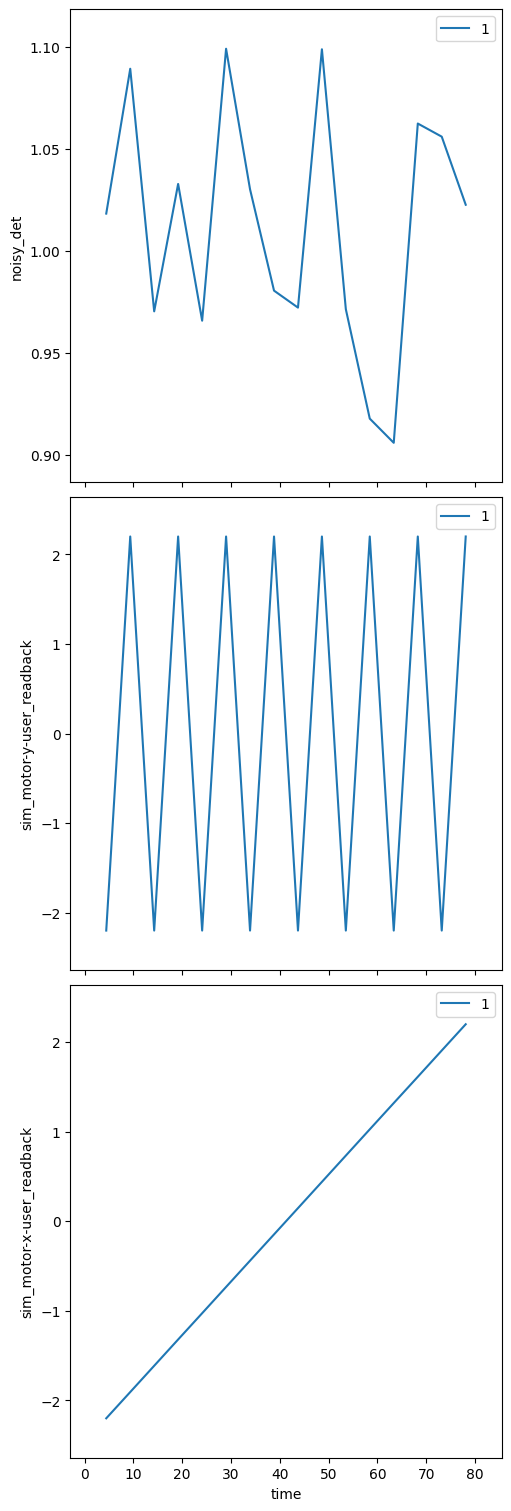

In [2]:
uid, = RE(stxm_fast(
    det=det,
    count_time = 0.2,
    step_motor = xyz_motor.x,
    step_start = -2.2,
    step_end   = 2.2,
    scan_motor = xyz_motor.y,
    scan_start = -2.2,
    scan_end   = 2.2,
    plan_time  = 50,
),bec)

In [ ]:
data